In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Load and preprocess the dataset
def load_images_and_labels(directory):
    images = []
    labels = []
    for folder in os.listdir(directory):
        if not folder.startswith('.'):
            label = int(folder[-1]) - 1
            folder_path = os.path.join(directory, folder)
            for file in os.listdir(folder_path):
                if not file.startswith('.'):
                    image_path = os.path.join(folder_path, file)
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image = cv2.resize(image, (128, 128))
                    images.append(image)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels('leapGestRecog')

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images for CNN input
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
# Determine the number of classes dynamically
num_classes = len(os.listdir('leapGestRecog'))

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Dynamically setting the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.6664 - loss: 4.6643 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.9865 - loss: 0.0368 - val_accuracy: 1.0000 - val_loss: 5.3547e-05
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 6.0844e-05
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9903 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 1.8856e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.9914 - loss: 0.0228 - val_accuracy: 1.0000 - val_loss: 1.8164e-07
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9927 - loss: 0.0215 - val_accuracy: 1.0000 - val_loss: 2.9536e-05
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9931 - loss: 0.0267 - val_accuracy: 1.0000 - val_loss: 5.3643e-07
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - ac

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 8.5270e-09
Test Accuracy: 1.0


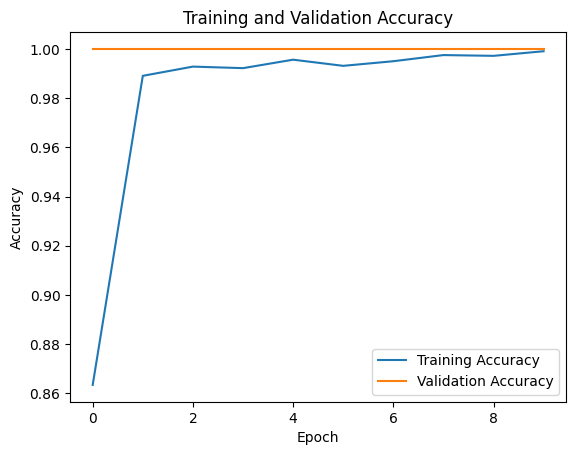

In [9]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
